<a href="https://colab.research.google.com/github/revati2013/Assignment05_Multi-Linear-Regression/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
d=pd.read_csv('50_Startups.csv')

In [ ]:
d

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data=d.rename({'R&D Spend':'RDS','Administration':'Adms','Marketing Spend':'MS'},axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   Adms    50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data[data.duplicated()]

,RDS,Adms,MS,State,Profit


No duplicate data

In [ ]:
data.describe()

,RDS,Adms,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#correlation analysis
data.corr()

,RDS,Adms,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Adms,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


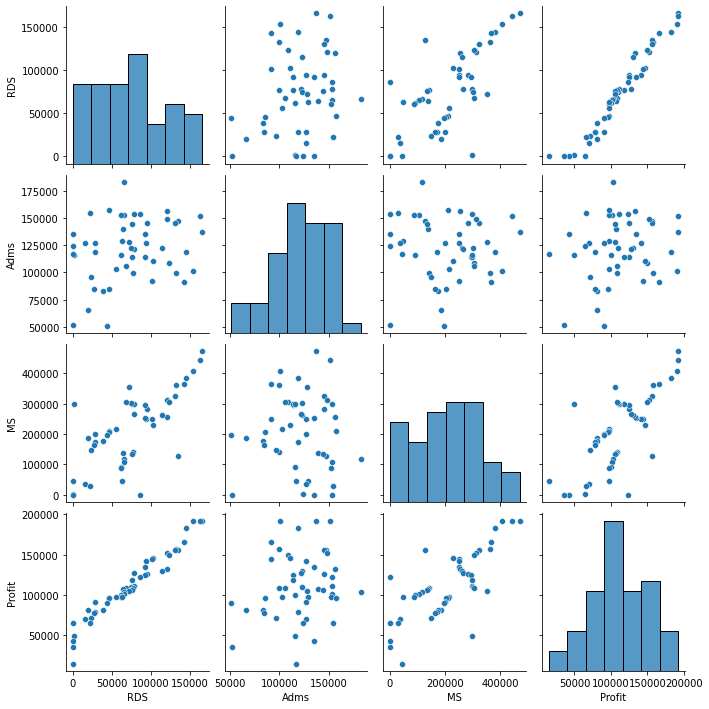

In [ ]:
sns.pairplot(data)

In [ ]:
#model building
model=smf.ols("Profit~RDS+Adms+MS",data=data).fit()

In [ ]:
model.params

Intercept    50122.192990
RDS              0.805715
Adms            -0.026816
MS               0.027228
dtype: float64

In [ ]:
#finding tvalues and pvalues
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 Adms         -0.525507
 MS            1.655077
 dtype: float64, Intercept    0.00000
 RDS          0.00000
 Adms         0.60176
 MS           0.10472
 dtype: float64)

In [ ]:
#finding rsquared values
model.rsquared , model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

Model accuracy is 94.75%

In [ ]:
# Building SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also finding their tvalues and pvalues
slr_a=smf.ols("Profit~Adms", data=data).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    3.040044
 Adms         1.419493
 dtype: float64, Intercept    0.003824
 Adms         0.162217
 dtype: float64)

In [ ]:
slr_m=smf.ols("Profit~MS",data=data).fit()
slr_m.tvalues, slr_m.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64, Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [ ]:
mlr_am=smf.ols("Profit~Adms+MS",data=data).fit()
mlr_am.tvalues, mlr_am.pvalues

(Intercept    1.142741
 Adms         2.467779
 MS           8.281039
 dtype: float64, Intercept    2.589341e-01
 Adms         1.729198e-02
 MS           9.727245e-11
 dtype: float64)

In [ ]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~Adms+MS",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Adms~RDS+MS",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RDS+Adms",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','Adms','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,Adms,1.175091
2,MS,2.326773


None variable has VIF>20,no collinearity

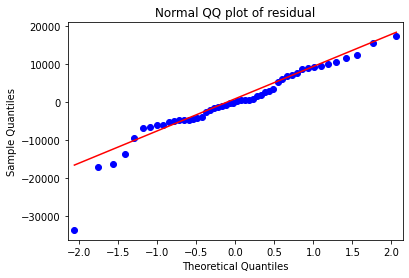

In [ ]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
plt.title("Normal QQ plot of residual")
plt.show()

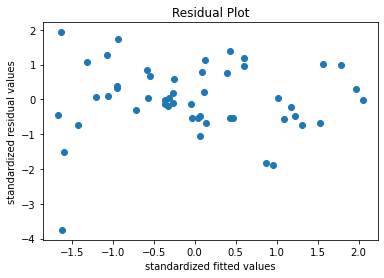

In [ ]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

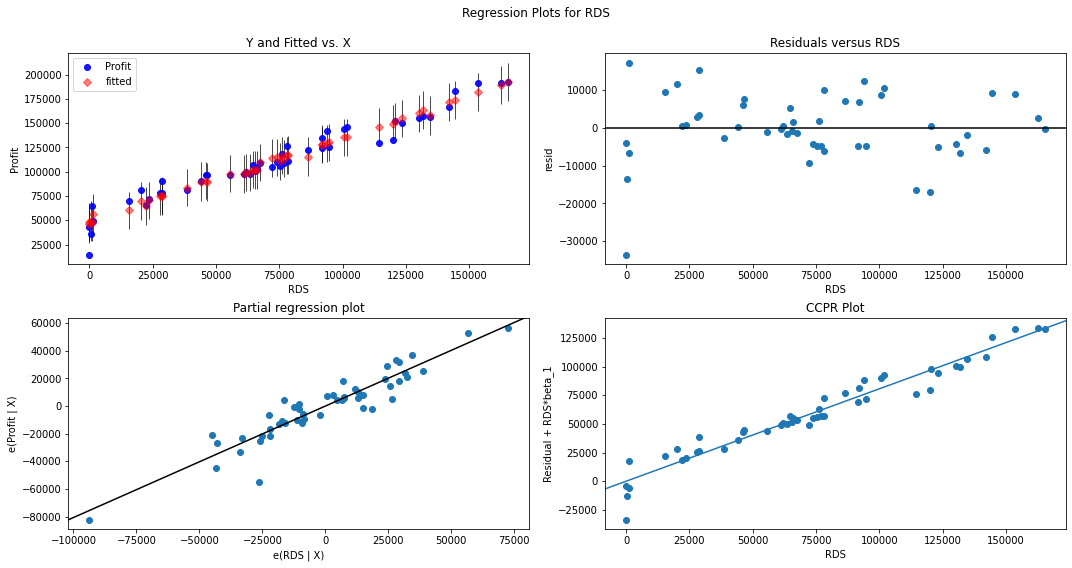

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

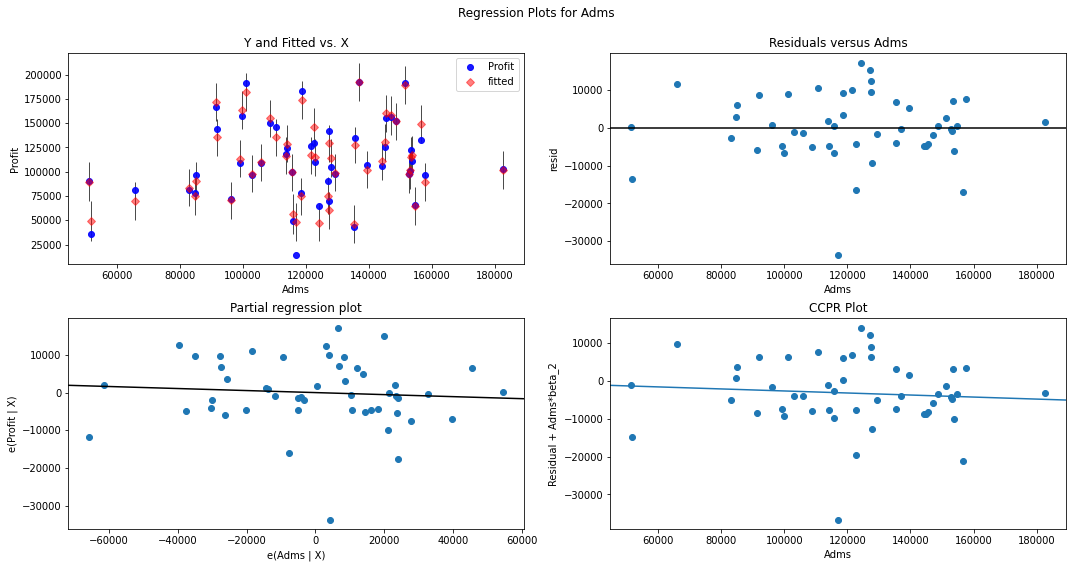

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Adms',fig=fig)
plt.show()

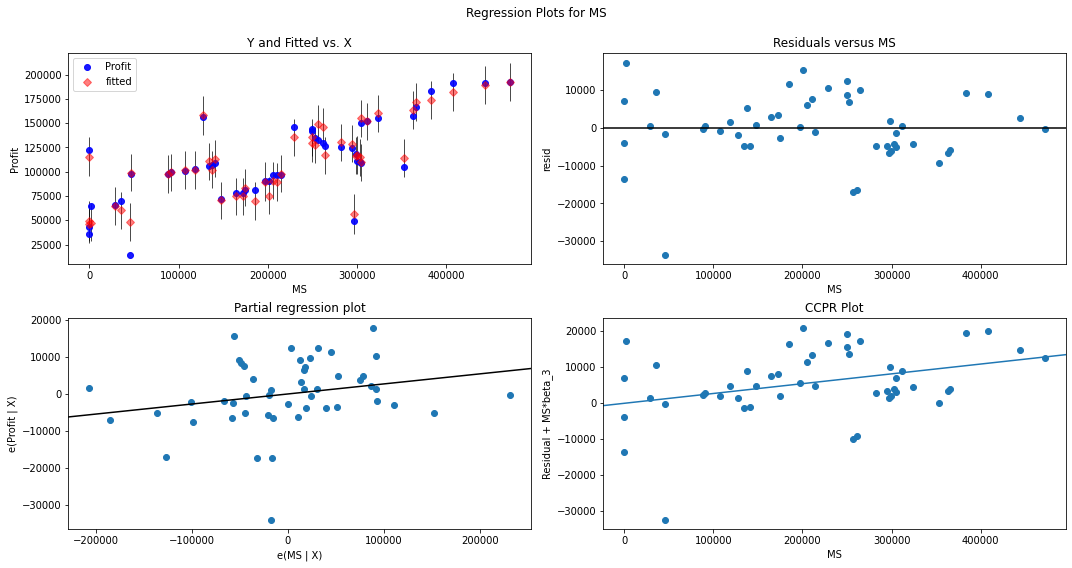

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

In [ ]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
# Two Techniques : 1. Cook's Distance & 2. Leverage value
(c,_)=model.get_influence().cooks_distance

In [ ]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


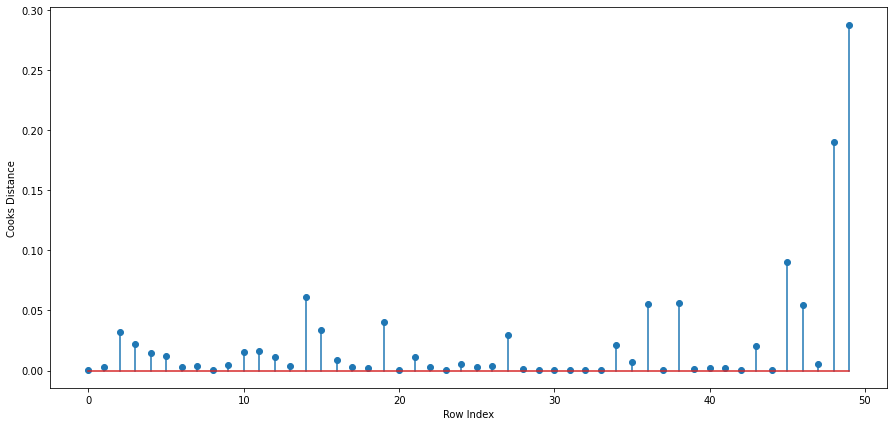

In [ ]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(15,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(c),np.max(c)

(49, 0.2880822927543272)

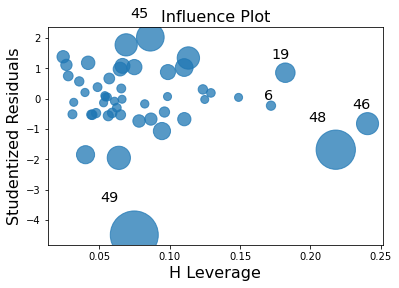

In [ ]:
# 2. Leverage Value using High Influence Points
influence_plot(model)
plt.show()

In [ ]:
data[data.index.isin([49])]

,RDS,Adms,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
data1=data.drop(data.index[[49]],axis=0)

In [ ]:
data1

,RDS,Adms,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
 # Final Model
 final_model=smf.ols("Profit~RDS+Adms+MS",data=data1).fit()
 final_model.rsquared , final_model.aic

(0.9613162435129847, 1020.5652974526367)

model accuracy is improved to 96.13%

In [ ]:
#New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"Adms":90000,"MS":140000},index=[0])
new_data

,RDS,Adms,MS
0,70000,90000,140000


In [ ]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [ ]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [ ]:
#table containing R^2 value for each prepared model
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)

In [ ]:
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
